In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.dpi'] = 80
%matplotlib inline


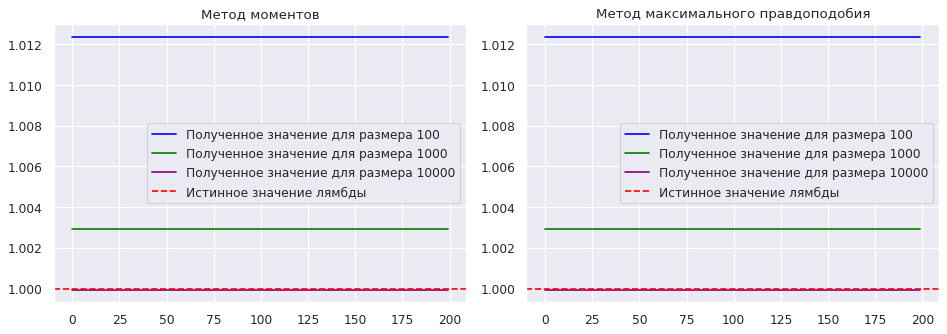

In [ ]:
from scipy.stats import expon

parameter = 1

samples = [100, 1000, 10000]
mm = []
ml = []
for size in samples:
    mm_sample = []
    ml_sample= []

    for _ in range(200):
        sample = expon.rvs(scale=parameter, size=size)

        mm_sample.append(1/np.mean(sample))


        ml_sample.append(1/np.mean(sample))

    mm.append(mm_sample)
    ml.append(ml_sample)
colors = ['blue', 'green', 'purple']
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for i in range(3):
    plt.plot([(np.mean(mm[i]))] * 200, color=colors[i], label = f"Полученное значение для размера {samples[i]}")
plt.title("Метод моментов")
plt.axhline(y= parameter, color='red', linestyle='--', label="Истинное значение лямбды")
plt.legend()

plt.subplot(2, 2, 2)
for i in range(3):
    plt.plot([np.mean(ml[i])] * 200 , color=colors[i], label = f"Полученное значение для размера {samples[i]}")
plt.title("Метод максимального правдоподобия")
plt.axhline(y=parameter, color='red', linestyle='--', label="Истинное значение лямбды")
plt.legend()

plt.tight_layout()
plt.show()


Задание 3:
Среднее выборочное значение возведенное в квадрат будет являться оценкой для параметра тета в квадрате или для параметра лямбда в минус второй степени. Это следует из линейности оценки, что позволяет составить пропорцию.

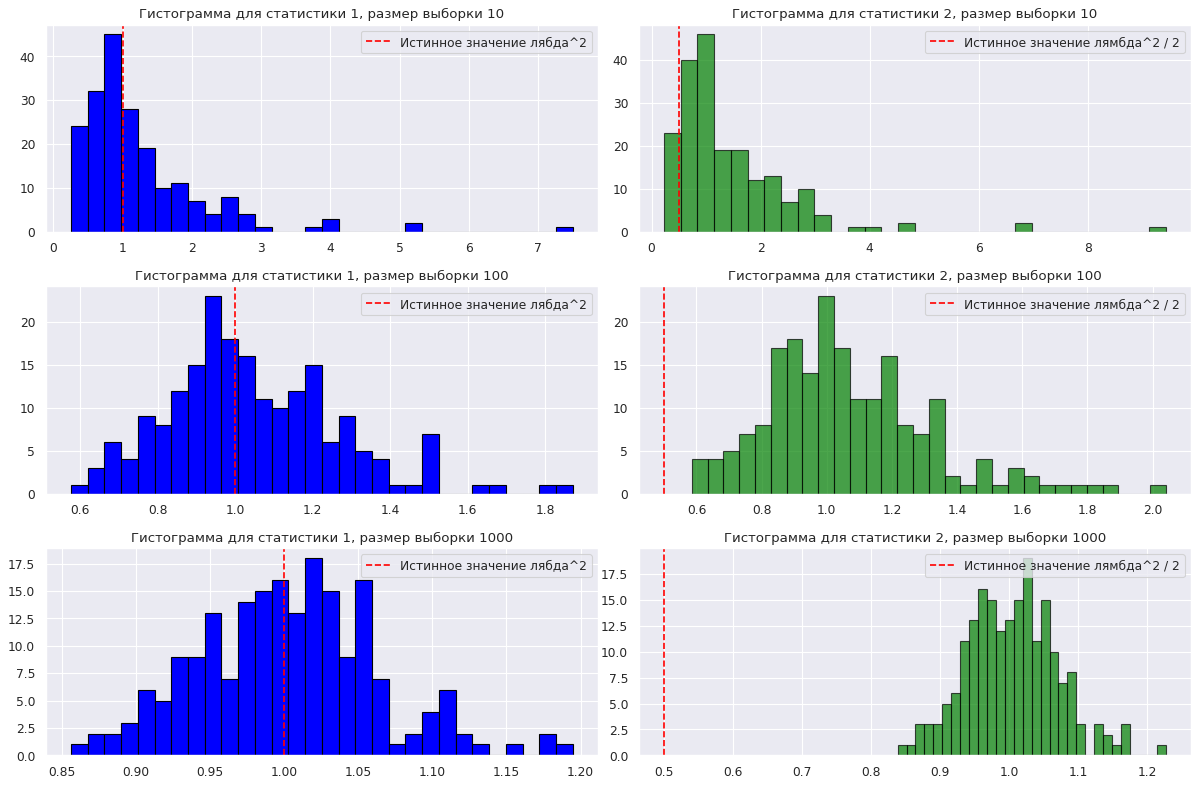

In [ ]:


parameter = 1

samples = [10, 100, 1000]

stat_1 = {size: [] for size in samples}
stat_2 = {size: [] for size in samples}

for size in samples:

    mm_sample = []
    ml_sample= []

    for _ in range(200):
        sample = expon.rvs(scale=parameter, size=size)

        stat_1[size].append(1/(np.mean(sample)**2))

        stat_2[size].append(1/(np.sum(sample**2) / (2 * size)))


colors = ['blue', 'green', 'purple']

plt.figure(figsize=(15, 10))

for i, size in enumerate(samples):
    plt.subplot(3, 2, 2*i+1)
    plt.hist(stat_1[size], bins=30, color='blue', edgecolor='black')
    plt.title(f"Гистограмма для статистики 1, размер выборки {size}")
    plt.axvline(x=parameter**2, color='red', linestyle='--', label="Истинное значение лябда^2")
    plt.legend()


    plt.subplot(3, 2, 2*i+2)
    plt.hist(stat_2[size], bins=30, alpha=0.7, color='green', edgecolor='black')
    plt.title(f"Гистограмма для статистики 2, размер выборки {size}")
    plt.axvline(x=parameter**2 / 2, color='red', linestyle='--', label="Истинное значение лямбда^2 / 2")
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
def MSE(pred, true):
    return np.mean((np.array(pred) - true)**2)
mse_1 = {size: MSE(stat_1[size], 1) for size in samples}
mse_2 = {size: MSE(stat_2[size], 1) for size in samples}
print(mse_1)
print(mse_2)

{10: 0.9529196896386765, 100: 0.05277923607389735, 1000: 0.003684974746885771}
{10: 1.499191282788053, 100: 0.06754329020257326, 1000: 0.004361085844711265}


Ошибка для второй оценки выше, также это отражается на графиках
Я думаю, что вторая оценка была смещена из-за умножение на 2 параметра 2, что увеличило ее ошибку.

Задание 3:
Да, матожидание может находить левее первого квартиля, если у распределения есть экстремальное значение, которое смещает среднее. Например, предположим, что у нас есть дискретное распределение (-1000,-100,-10, 10, 10, 10,3,2,1,0) с равнораспределенной вероятностью, тогда медианой будет 10, а матожидание будет равняться -107.4, тогда как первый квартиль будет где-то с -32.
